In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import re
from konlpy.tag import Okt
from torch.utils.data import Dataset, DataLoader, random_split

In [134]:
majorDF = pd.read_csv('../data/major.csv', encoding='utf-8', index_col=0)

In [135]:
okt = Okt()

In [55]:
from string import punctuation

punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [56]:
majorDF['대사'] = majorDF['대사'].str.replace(f'[{punctuation}]', '', regex=True)

In [57]:
majorDF['대사'].head(20)

2     해방이다 그토록 온 세상이 염원하던 독립이 왔다 이 독립을 위해 얼마나 많은 사람들...
3     아버님이 그리하셨고 어머님이 그리하셨다 이제 난 이 새로운 조국에서 과연 무엇을 해...
4          주먹패로 살아간다는 것은 더 이상 의미가 없다 무엇을 위해 누구와 싸운단 말인가
5          무엇을 해야할까 독립이 오고 해방이 왔는데 내가 할 일이 무엇일까 내가 할 일이
21                                    저희 큰형님을 만나러 오셨다구요
23         안 됐습니다만 헛걸음을 하셨습니다 우리도 요 몇 달 동안 큰형님을 못 뵈었습니다
25    글쎄요 우리도 큰형님을 찾고 있는 중입니다만 혹시 무슨 일인지 제가 먼저 알면 안 ...
28                                   치안대에 협조해 달라는 말씀입니까
31                무슨 말씀인지 잘 알겠습니다 큰형님이 돌아오시면 그렇게 전하겠습니다
34                                장권 동지라 아무튼 그렇게 전하겠습니다
36                                           예 안녕히 가십시오
37    새로운 조국 건설사업이라 세상이 온통 뒤죽박죽인데 뭐가 영광스러운 임무라는 것인가 ...
48    백성들이야 늘 그런 거 아닌가 바쁜 건 위정자들이야 옛날이나 지금이나 자신들이 진정...
50                               글쎄 민족진영에서 가만있을까 시끄러울거야
52                   아마도 그럴 테지 정국이 혼란한 만큼 기사거리가 많아질 테니까
53    해방정국 그랬다 해방은 곧 사회의 혼란으로 이어졌다 조선총독 아베와 정무총감 엔도오...
54    그러나 총독부가 당초의 약속을 어기고 정권 이양을 미루고 북쪽이 소련군의 진주와 함...
55    미국은 승전국으로서 건국준비위원회를 비롯한 모든 정부를 불인정하고 새 정부 

In [58]:
tokens = []
for i in majorDF.index: 
    tokens.append(okt.morphs(phrase=majorDF.loc[i]['대사'], stem=True))

In [59]:
tokens[0]

['해방',
 '이다',
 '그토록',
 '온',
 '세상',
 '이',
 '염원',
 '하다',
 '독립',
 '이',
 '오다',
 '이',
 '독립',
 '을',
 '위해',
 '얼마나',
 '많다',
 '사람',
 '들',
 '이',
 '싸우다',
 '죽다',
 '가다']

In [60]:
majorDF['token'] = tokens

In [61]:
token_count = []
for token in majorDF['token']:
    token_count.append(len(token))
majorDF['token count'] = token_count

In [62]:
majorDF['token count'].value_counts()

token count
2     1259
3     1256
1     1054
4     1001
5      943
7      846
6      834
8      747
9      726
12     681
10     679
11     652
14     579
15     576
19     575
13     571
16     560
17     547
20     517
18     508
21     483
23     465
24     451
22     449
26     410
27     398
25     382
28     334
29     327
30     297
31     291
32     276
33     235
34     205
35     180
36     135
37     123
38     103
39      75
40      68
41      62
42      43
43      29
44      27
45      21
46      18
47      16
49      15
48      14
50      12
51       4
55       4
52       3
53       1
Name: count, dtype: int64

In [63]:
majorDF['token count'].describe()

count    21067.000000
mean        14.454028
std         10.604913
min          1.000000
25%          5.000000
50%         12.000000
75%         22.000000
max         55.000000
Name: token count, dtype: float64

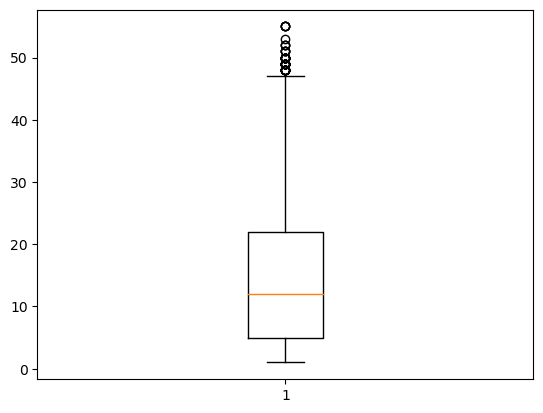

In [64]:
plt.boxplot(majorDF['token count'])
plt.show()

In [65]:
majorDF[majorDF['token count'] >= 40].shape

(337, 6)

In [66]:
majorDF[majorDF['token count'] >= 40][('대사')]

53       해방정국 그랬다 해방은 곧 사회의 혼란으로 이어졌다 조선총독 아베와 정무총감 엔도오...
54       그러나 총독부가 당초의 약속을 어기고 정권 이양을 미루고 북쪽이 소련군의 진주와 함...
56       그러나 조선의 정객들은 정파와 이념에 따라 서로 갈등하고 분열되고 있었다 공산주의와...
220      그 이후 이때까지만 해도 그는 적어도 주먹조직의 사람은 아니었다 이정재는 이천 사람...
313      박헌영 조선 공산주의 운동의 대표적인 인물이다 일제 말기 전라남도 광주에서 기와 공...
                               ...                        
35633    나는 평생을 독립을 위해서 싸워왔어 우리 안동김씨 가문의 조부님 되시는분은 구한말 ...
35635    이보시요 검사 양반 똥만도 못한 놈들한테 똥을 뿌린게 뭐가 잘못이란 말이야 도대체 ...
35706    용서해 주십시오 그게 다 애국을 하느라고 그렇게 됐습니다 용서해 주십시오 용서해 주...
35718    많은 인파가 몰린 그의 장례 행렬에는 한 무리의 어린 아이들도 그 뒤를 잇고 있었다...
35720    김두한 그는 일제 말 우리가 주권을 잃었던 식민지 시절부터 해방 이후 좌우익의 대립...
Name: 대사, Length: 337, dtype: object

In [67]:
majorDF[majorDF['token count'] < 4].shape

(3569, 6)

In [68]:
majorDF[majorDF['token count'] < 4][('대사')]

36        예 안녕히 가십시오
95                형님
99              아 글제
111      좋으셨겠습니다 큰형님
116                쉬
            ...     
35675           채원기는
35680             그래
35710     괜찮아 일찍 들어가
35712         그래 괜찮아
35714             그래
Name: 대사, Length: 3569, dtype: object

In [69]:
majorDF[(majorDF['token count'] >= 4) & (majorDF['token count'] < 40)].shape

(17161, 6)

In [70]:
majorDF[(majorDF['token count'] >= 4) & (majorDF['token count'] < 40)]['대사']

2        해방이다 그토록 온 세상이 염원하던 독립이 왔다 이 독립을 위해 얼마나 많은 사람들...
3        아버님이 그리하셨고 어머님이 그리하셨다 이제 난 이 새로운 조국에서 과연 무엇을 해...
4             주먹패로 살아간다는 것은 더 이상 의미가 없다 무엇을 위해 누구와 싸운단 말인가
5             무엇을 해야할까 독립이 오고 해방이 왔는데 내가 할 일이 무엇일까 내가 할 일이
21                                       저희 큰형님을 만나러 오셨다구요
                               ...                        
35707    이미 죽은 사람이거나 살아있는 사람이거나 다 다 살펴 주십시오 평생 고생만 해온 내...
35716    천구백칠십이년 십일월 이십일일 김두한은 오랜 지병이었던 고혈압으로 쓰러졌다 향년 오...
35721    나는 오랫동안 자네를 지켜보아 온 사람일세 자네는 자네답게 살았어 조선의 주먹 황제...
35722    나름대로 자네의 역사를 가지고 자네의 시대를 치열하고 열심히 살았다는 얘기야 뭐랄까...
35723    야인시대 그렇다 그것은 바로 그가 몸바쳐 살아왔던 이 나라 격동기의 또 다른 역사의...
Name: 대사, Length: 17161, dtype: object

In [71]:
majorDF.shape

(21067, 6)

In [72]:
vocab_count = {}

for token in majorDF['token']:
    for t in token:
        if t in vocab_count.keys():
            vocab_count[t] += 1
        else:
            vocab_count[t] = 1

In [73]:
vocab_count

{'해방': 63,
 '이다': 2293,
 '그토록': 13,
 '온': 173,
 '세상': 196,
 '이': 13140,
 '염원': 1,
 '하다': 9677,
 '독립': 42,
 '오다': 1057,
 '을': 6370,
 '위해': 265,
 '얼마나': 177,
 '많다': 523,
 '사람': 1179,
 '들': 4602,
 '싸우다': 249,
 '죽다': 377,
 '가다': 1230,
 '아버님': 75,
 '그리다': 79,
 '어머님': 14,
 '이제': 450,
 '난': 339,
 '새롭다': 85,
 '조국': 52,
 '에서': 1016,
 '과연': 44,
 '무엇': 74,
 '것': 1899,
 '인가': 260,
 '주먹': 393,
 '패': 38,
 '로': 996,
 '살아가다': 11,
 '은': 3121,
 '더': 514,
 '이상': 69,
 '의미': 28,
 '가': 5127,
 '없다': 1411,
 '누구': 226,
 '와': 426,
 '말': 3316,
 '내': 1451,
 '일이': 833,
 '저희': 99,
 '크다': 524,
 '형님': 1211,
 '만나다': 290,
 '안': 1054,
 '돼다': 1110,
 '헛걸음': 3,
 '우리': 1820,
 '도': 2080,
 '요': 1013,
 '몇': 149,
 '달': 40,
 '동안': 53,
 '못': 658,
 '뵈다': 43,
 '글쎄요': 26,
 '찾다': 111,
 '있다': 4164,
 '중': 164,
 '혹시': 53,
 '무슨': 668,
 '일인': 44,
 '지': 398,
 '제': 451,
 '먼저': 103,
 '알': 510,
 '면': 168,
 '되다': 2169,
 '치안': 57,
 '대': 150,
 '에': 3490,
 '협조': 27,
 '달라': 77,
 '는': 2107,
 '말씀': 312,
 '입': 156,
 '니까': 702,
 '인지': 69,
 '자다': 878,


In [74]:
vocab_dict = {'<PAD>':0, '<UNK>':1}

for idx, token in enumerate(vocab_count.keys()):
    vocab_dict[token] = idx+2

In [75]:
len(vocab_dict)

11005

In [76]:
custom_encoder = {}
for idx, char in enumerate(majorDF['인물'].unique()):
    custom_encoder[char] = idx

In [77]:
custom_encoder

{'두한': 0,
 '김영태': 1,
 '최동열': 2,
 '나레이션': 3,
 '장택상': 4,
 '유진산': 5,
 '조병옥': 6,
 '개코': 7,
 '신영균': 8,
 '홍만길': 9,
 '문영철': 10,
 '정진영': 11,
 '김천호': 12,
 '이정재': 13,
 '김관철': 14,
 '염동진': 15,
 '이화룡': 16,
 '삼수': 17,
 '정팔': 18,
 '이승만': 19,
 '이기붕': 20,
 '워태커': 21,
 '시라소니': 22,
 '애기보살': 23,
 '임화수': 24,
 '조열승': 25,
 '곽영주': 26,
 '눈물': 27,
 '김기홍': 28,
 '김동진': 29,
 '독사': 30,
 '이석재': 31,
 '이억일': 32,
 '이영숙': 33,
 '한백수': 34,
 '유지광': 35,
 '정대발': 36}

In [78]:
majorDF['인물'] = majorDF['인물'].replace(custom_encoder)

In [79]:
majorDF['인물']

2        0
3        0
4        0
5        0
21       1
        ..
35718    3
35720    3
35721    2
35722    2
35723    3
Name: 인물, Length: 21067, dtype: int64

In [80]:
padded_token = []
max_len = majorDF['token count'].max()

for tokens in majorDF['token']:
    current_len = len(tokens)
    tokens.extend(['<PAD>' for _ in range(max_len-current_len)])
    padded_token.append(tokens)

In [81]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   padded_token[24], len(padded_token[24])

(['맞다',
  '말',
  '이오',
  '어떻다',
  '되찾다',
  '나라',
  '인데',
  '공산',
  '주의자',
  '들',
  '한테',
  '넘겨주다',
  '수',
  '는',
  '없다',
  '일',
  '이지',
  '요',
  '<PAD>',
  '<PAD>',
  '<PAD>',
  '<PAD>',
  '<PAD>',
  '<PAD>',
  '<PAD>',
  '<PAD>',
  '<PAD>',
  '<PAD>',
  '<PAD>',
  '<PAD>',
  '<PAD>',
  '<PAD>',
  '<PAD>',
  '<PAD>',
  '<PAD>',
  '<PAD>',
  '<PAD>',
  '<PAD>',
  '<PAD>',
  '<PAD>',
  '<PAD>',
  '<PAD>',
  '<PAD>',
  '<PAD>',
  '<PAD>',
  '<PAD>',
  '<PAD>',
  '<PAD>',
  '<PAD>',
  '<PAD>',
  '<PAD>',
  '<PAD>',
  '<PAD>',
  '<PAD>',
  '<PAD>'],
 55)

In [82]:
majorDF.reset_index(inplace=True)

In [83]:
majorDF['padded_token'] = padded_token

In [84]:
label = majorDF['인물']
encoded_token = []

for tokens in majorDF['padded_token']:
    encoded_token.append([ vocab_dict[token] for token in tokens ])

In [85]:
label.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36], dtype=int64)

In [86]:
encoded_token

[[2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  7,
  11,
  7,
  10,
  12,
  13,
  14,
  15,
  16,
  17,
  7,
  18,
  19,
  20,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [21,
  7,
  22,
  23,
  7,
  22,
  24,
  25,
  7,
  26,
  27,
  28,
  29,
  30,
  12,
  9,
  31,
  32,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [33,
  34,
  35,
  36,
  31,
  37,
  38,
  39,
  40,
  41,
  42,
  30,
  12,
  13,
  43,
  44,
  18,
  45,
  32,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [30,
  12,
  9,
  9,
  10,
  7,
  11,
  2,
  7,
  11,
  46,
  41,
  9,
  47,
  30,
  3,
  46,
  41,
  9,
  47,
  0,
  0,
  0,


In [87]:
class CustomDataset(Dataset):
    def __init__(self, text, label):

        self.x_data = torch.tensor(text)
        self.y_data = label

    def __len__(self):
        return len(self.x_data)

    def __getitem__(self, idx):
        x = self.x_data[idx]
        y = self.y_data[idx]
        return x, y
    
    def to_DataLoader(self, batch_size):
        return DataLoader(self, batch_size, shuffle=True)

In [88]:
from torchtext.vocab import build_vocab_from_iterator

In [89]:
DS = CustomDataset(encoded_token, label)

In [90]:
trainDS, validDS, testDS = random_split(DS, [0.7, 0.1, 0.2], generator=torch.Generator().manual_seed(40))

In [91]:
trainDS[1]

(tensor([ 550, 1064,    7, 6454, 1458,  566,  927,    7, 2986,  118, 2986,    7,
          285,  312, 4662, 2671,  479,   65,    7,  562,    7, 1458,  741,  181,
           20,  378,   42, 1374,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0]),
 13)

In [92]:
from torchtext.vocab import build_vocab_from_iterator

In [93]:
def yield_tokens(data_iter):
    for label, text in data_iter:
        yield okt.morphs(text, stem=True)

In [94]:
class SentenceClassifier(nn.Module):
    def __init__(
            self,
            n_vocab,
            hidden_dim,
            embedding_dim,
            n_class,
            n_layers,
            dropout=0.5,
            bidirectional=True,
            model_type='lstm'
    ):
        super().__init__()

        self.embedding = nn.Embedding(
            num_embeddings=n_vocab,
            embedding_dim=embedding_dim,
            padding_idx=0
        )
        if model_type == 'rnn':
            self.model = nn.RNN(
                input_size=embedding_dim,
                hidden_size=hidden_dim,
                num_layers=n_layers,
                bidirectiional=bidirectional,
                dropout=dropout,
                batch_first=True
            )
        elif model_type == 'lstm':
            self.model = nn.LSTM(
                input_size=embedding_dim,
                hidden_size=hidden_dim,
                num_layers=n_layers,
                bidirectional=bidirectional,
                dropout=dropout,
                batch_first=True
            )

        if bidirectional:
            self.classifier = nn.Linear(hidden_dim*2, n_class)
        else:
            self.classifier = nn.Linear(hidden_dim, n_class)
        self.dropout = nn.Dropout(dropout)
    
    def forward(self, inputs):
        embeddings = self.embedding(inputs)
        output, _ = self.model(embeddings)
        last_output = output[:, -1, :]
        last_output = self.dropout(last_output)
        logits = self.classifier(last_output)
        return logits

In [107]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

model = SentenceClassifier(
    n_vocab=len(vocab_dict),
    hidden_dim=30,
    embedding_dim=100,
    n_class=majorDF['인물'].nunique(),
    n_layers=7,
    dropout=0.5,
    bidirectional=True,
    model_type='lstm'
).to(device)

optim = torch.optim.Adam(model.parameters())
cost_fn = nn.CrossEntropyLoss().to(device) 

In [108]:
batch_size = 64
trainDL = DataLoader(trainDS, batch_size, shuffle=True, drop_last=True)
validDL = DataLoader(validDS, batch_size, shuffle=True, drop_last=True)
testDL = DataLoader(testDS, batch_size, shuffle=True, drop_last=True)

In [109]:
len(trainDL), len(trainDS)

(230, 14747)

In [110]:
for x, y in trainDL:
    print(x.shape)
    print(x)
    print(y.shape)
    break
    # print(len(x), x[0].shape)
    # print(len(y), y.shape)

torch.Size([64, 55])
tensor([[ 344,  150,   86,  ...,    0,    0,    0],
        [ 120,  121,  566,  ...,    0,    0,    0],
        [ 258, 5185, 1733,  ...,    0,    0,    0],
        ...,
        [ 120, 5555,  250,  ...,    0,    0,    0],
        [ 283, 1433,  118,  ...,    0,    0,    0],
        [  96,  120,   31,  ...,    0,    0,    0]])
torch.Size([64])


In [111]:
# 점수 초기화
# train_score = []
# train_cost = []
# valid_score = []
# valid_cost = []

In [112]:
from torchmetrics.functional import accuracy

In [113]:
def train_model(model, optimizer, cost_fn, trainloader, validloader, epochs):
    for e in range(epochs+1):
        
        model.train()
        
        for x, y in trainloader:
            x, y  = x.to(device), y.to(device)
            h = model(x)
            
            cost = cost_fn(h, y).to(device)
            
            optimizer.zero_grad()
            cost.backward()
            optimizer.step()
            
            train_cost.append(cost.item())
            train_score.append(accuracy(h, y, task='multiclass', num_classes=majorDF['인물'].nunique()))
            
        model.eval()
        for x, y in validloader:
            x, y  = x.to(device), y.to(device)
            h = model(x)
            
            cost = cost_fn(h, y).to(device)
            
            valid_cost.append(cost.item())
            valid_score.append(accuracy(h, y, task='multiclass', num_classes=majorDF['인물'].nunique()))
            
        print(f'Epoch: {e:4}/{epochs:4} --------')
        print(f'Train cost: {sum(train_cost)/len(train_cost)}, score: {sum(train_score)/len(train_score)}')
        print(f'Valid cost: {sum(valid_cost)/len(valid_cost)}, score: {sum(valid_score)/len(valid_score)}')

In [114]:
train_score = []
train_cost = []
valid_score = []
valid_cost = []
train_model(model, optim, cost_fn, trainDL, validDL, 1000)

Epoch:    0/1000 --------
Train cost: 3.346731828606647, score: 0.14266304671764374
Valid cost: 3.2880299612879753, score: 0.15771484375
Epoch:    1/1000 --------
Train cost: 3.3226576364558675, score: 0.14755435287952423
Valid cost: 3.290245532989502, score: 0.1572265625
Epoch:    2/1000 --------
Train cost: 3.3150170353875645, score: 0.14895834028720856
Valid cost: 3.2870780155062675, score: 0.1580403596162796
Epoch:    3/1000 --------
Train cost: 3.3098486076230587, score: 0.14979620277881622
Valid cost: 3.28535096347332, score: 0.15869140625
Epoch:    4/1000 --------
Train cost: 3.3063295638042947, score: 0.15029890835285187
Valid cost: 3.286615477502346, score: 0.15839843451976776
Epoch:    5/1000 --------
Train cost: 3.303844058168107, score: 0.1507246345281601
Valid cost: 3.285219473143419, score: 0.1583658903837204
Epoch:    6/1000 --------
Train cost: 3.301803193773542, score: 0.15104813873767853
Valid cost: 3.2843665736062184, score: 0.1587611585855484
Epoch:    7/1000 ------

KeyboardInterrupt: 

In [ ]:
majorDF['인물'].nunique()

In [ ]:
train_score

In [ ]:
train_cost

In [ ]:
torch.save(model, './first_model.pkl')